### Análise de lag

Este notebook tem por finalidade analisar a quantidade apropriada de "lag" para as bases de dados utilizadas

A análise será feita considerando os períodos de:
* 1 dia
* 2 dias
* 5 dias
* 10 dias

### Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Funções

In [2]:
def read(path, open_ = False):
    
    df = pd.read_csv(path, index_col = 0)
    
    df.rename(columns={'Alvo':'Close 0'}, inplace=True)
    df.rename(columns={'Abertura':'Open 0'}, inplace=True)
    
    if not(open_):
        df.drop(columns='Open 0', inplace = True)
    
    return df

In [3]:
def lag(df, size, open_ = False):
    
    for i in range(1, (int(size)+1)):
        
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
        
        if open_:
            
            df['Open '+str(i)] = df['Open '+str(i-1)].shift(1)
            
    df.rename(columns={'Close 0':'Target'}, inplace=True)
    df.dropna(inplace=True)
            
    return df

In [17]:
def X_Y(df):
    
    X = df.drop(columns = 'Target')
    y = df.loc[:,'Target'].tolist()
    
    return X, y

In [18]:
def training(df):
    
    X, y = X_Y(df)
    
    mod = SVR(kernel='linear', C=1)
    rf = RandomForestRegressor()
    
    scores_svr = cross_val_score(mod, X, y, cv=5)
    scores_rf = cross_val_score(rf, X, y, cv=5)
    
    scores = (scores_svr+scores_rf)/2
    
    max_ = max(scores)
    avg_ = (sum(scores)/len(scores))
    
    print("MAX: ", max_)
    print("AVG: ", avg_)
    return  max_, avg_

In [19]:
datasets = ['FB_1','FB_3','FB_5',
           'PBR_1','PBR_3','PBR_5',
           'AAPL_1','AAPL_3','AAPL_5',
           'TSLA_1','TSLA_3','TSLA_5']

size = [2,3,5,7,10]

res_max = {}
res_avg = {}

In [20]:
for data in datasets:
    max_ = []
    avg_ = []
    for sz in size:
        
        file = 'Datasets/Acoes/'+str(data)+'.csv'
        nome = str(data)+'-'+str(sz)
        print(nome)
        
        df = read(file)
        print('READ OK')
        df = lag(df, sz)
        print("LAG OK")
        max_return, avg_return = training(df)
        print("TReINADO")
        
        max_.append(max_return)
        avg_.append(avg_return)
        
    res_max[data] = {
        'Lag 2': max_[0],
        'Lag 3': max_[1],
        'Lag 5': max_[2],
        'Lag 7': max_[3],
        'Lag 10': max_[4]
    }
    res_avg[data] = {
        'Lag 2': avg_[0],
        'Lag 3': avg_[1],
        'Lag 5': avg_[2],
        'Lag 7': avg_[3],
        'Lag 10': avg_[4]
    }
        
    print(res_max)

FB_1-2
READ OK
LAG OK
MAX:  0.7831065192559643
AVG:  0.0727508076812916
TReINADO
FB_1-3
READ OK
LAG OK
MAX:  0.7738322569615232
AVG:  -0.03644992516179544
TReINADO
FB_1-5
READ OK
LAG OK
MAX:  0.7604189141523297
AVG:  -0.3086913777597621
TReINADO
FB_1-7
READ OK
LAG OK
MAX:  0.713519425330113
AVG:  -0.6007407730487204
TReINADO
FB_1-10
READ OK
LAG OK
MAX:  0.7070861883604302
AVG:  -0.5413766595354889
TReINADO
{'FB_1': {'Lag 2': 0.7831065192559643, 'Lag 3': 0.7738322569615232, 'Lag 5': 0.7604189141523297, 'Lag 7': 0.713519425330113, 'Lag 10': 0.7070861883604302}}
FB_3-2
READ OK
LAG OK
MAX:  0.8958903271787761
AVG:  0.29959832103192224
TReINADO
FB_3-3
READ OK
LAG OK
MAX:  0.896561964112313
AVG:  0.19767397691823668
TReINADO
FB_3-5
READ OK
LAG OK
MAX:  0.9031499125683624
AVG:  0.12473244957003296
TReINADO
FB_3-7
READ OK
LAG OK
MAX:  0.9053291072878937
AVG:  0.17225028183430835
TReINADO
FB_3-10
READ OK
LAG OK
MAX:  0.9045971373611059
AVG:  0.11819363492127648
TReINADO
{'FB_1': {'Lag 2': 0.783

MAX:  0.9890732508011282
AVG:  -0.08119743036257185
TReINADO
AAPL_5-3
READ OK
LAG OK
MAX:  0.988308469696799
AVG:  -0.09661904462942966
TReINADO
AAPL_5-5
READ OK
LAG OK
MAX:  0.9862727860069453
AVG:  -0.055170138929151194
TReINADO
AAPL_5-7
READ OK
LAG OK
MAX:  0.986006331959976
AVG:  -0.0020351327129409457
TReINADO
AAPL_5-10
READ OK
LAG OK
MAX:  0.9857197032608731
AVG:  0.03246502797325405
TReINADO
{'FB_1': {'Lag 2': 0.7831065192559643, 'Lag 3': 0.7738322569615232, 'Lag 5': 0.7604189141523297, 'Lag 7': 0.713519425330113, 'Lag 10': 0.7070861883604302}, 'FB_3': {'Lag 2': 0.8958903271787761, 'Lag 3': 0.896561964112313, 'Lag 5': 0.9031499125683624, 'Lag 7': 0.9053291072878937, 'Lag 10': 0.9045971373611059}, 'FB_5': {'Lag 2': 0.9745163502722023, 'Lag 3': 0.9754201096277011, 'Lag 5': 0.9749212937300491, 'Lag 7': 0.973856059498141, 'Lag 10': 0.9721781820968928}, 'PBR_1': {'Lag 2': 0.9515183148401434, 'Lag 3': 0.9492921885236663, 'Lag 5': 0.9528992359435124, 'Lag 7': 0.9544111365038521, 'Lag 1

In [21]:
df_max = pd.DataFrame(res_max)
df_max.head()

,FB_1,FB_3,FB_5,PBR_1,PBR_3,PBR_5,AAPL_1,AAPL_3,AAPL_5,TSLA_1,TSLA_3,TSLA_5
Lag 2,0.783107,0.895890,0.974516,0.951518,0.976085,0.975610,0.796484,0.975121,0.989073,0.869569,0.926827,0.983249
Lag 3,0.773832,0.896562,0.975420,0.949292,0.975475,0.976484,0.765015,0.976824,0.988308,0.884025,0.924720,0.981605
Lag 5,0.760419,0.903150,0.974921,0.952899,0.973027,0.976253,0.720705,0.978199,0.986273,0.855529,0.916081,0.979283
Lag 7,0.713519,0.905329,0.973856,0.954411,0.971544,0.974946,0.624542,0.978782,0.986006,0.833998,0.958288,0.978199
Lag 10,0.707086,0.904597,0.972178,0.955237,0.970692,0.973772,0.498128,0.982227,0.985720,0.802802,0.957497,0.979218


In [22]:
df_avg = pd.DataFrame(res_avg)
df_avg.head()

,FB_1,FB_3,FB_5,PBR_1,PBR_3,PBR_5,AAPL_1,AAPL_3,AAPL_5,TSLA_1,TSLA_3,TSLA_5
Lag 2,0.072751,0.299598,0.513183,0.796063,0.911736,0.938294,0.096515,0.215087,-0.081197,0.096753,0.531319,0.743438
Lag 3,-0.036450,0.197674,0.574386,0.756981,0.916373,0.938701,0.109817,0.111112,-0.096619,0.102014,0.538314,0.738812
Lag 5,-0.308691,0.124732,0.490169,0.499627,0.917179,0.940602,0.174551,0.097094,-0.055170,0.099496,0.527846,0.734176
Lag 7,-0.600741,0.172250,0.453693,0.483805,0.919348,0.940807,0.102207,0.084055,-0.002035,0.095243,0.558086,0.730575
Lag 10,-0.541377,0.118194,0.488257,0.423976,0.919366,0.940542,0.024599,0.020185,0.032465,0.111942,0.556264,0.729557


In [23]:
import seaborn as sns

<AxesSubplot:>

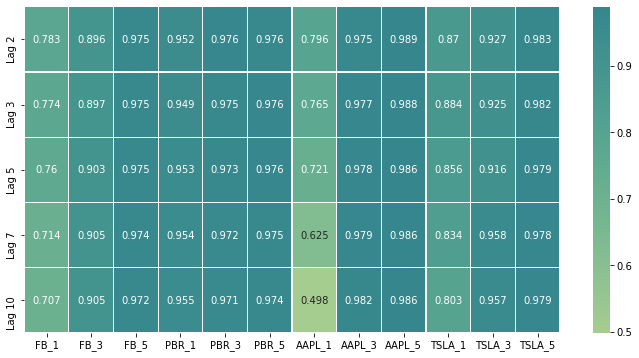

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_max, annot=True, cmap='crest', center=1., fmt='.3g', linecolor='white', linewidths=0.2)

### Salvando datasets

In [47]:
datasets = ['FB_1','FB_3','FB_5',
           'PBR_1','PBR_3','PBR_5',
           'AAPL_1','AAPL_3','AAPL_5',
           'TSLA_1','TSLA_3','TSLA_5']

In [42]:
def open_(file):
    df = pd.read_csv(file, index_col=0)
    df.rename(columns={'Alvo':'Close 0'}, inplace=True)
    df.drop(columns='Abertura', inplace = True)
    return df
    
def lag_(df, size):
    for i in range(1, (int(size)+1)):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    df.rename(columns={'Close 0':'Target'}, inplace=True)
    df.dropna(inplace=True)
    return df

def make_df(df):
    
    train, test = train_test_split(df, test_size = 0.25, random_state=10)
    
    return train, test

In [48]:
for d in datasets:
    file = "Datasets/"+str(d)+".csv"
    
    df = open_(file)
    df = lag_(df, 5)
    train, test = make_df(df)
    
    df_train = pd.DataFrame(train)
    df_test = pd.DataFrame(test)
    
    df_test.to_csv(str(d)+'_test.csv')
    df_train.to_csv(str(d)+'_train.csv')